In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [45]:
df1=pd.read_csv('CH4.csv')

In [46]:
df1

,system:time_start,CH4_column_volume_mixing_ratio_dry_air
0,8-Feb-19,NaN
1,8-Feb-19,NaN
2,8-Feb-19,NaN
3,8-Feb-19,NaN
4,8-Feb-19,NaN
...,...,...
24392,24-Feb-24,NaN
24393,24-Feb-24,NaN
24394,24-Feb-24,NaN
24395,24-Feb-24,NaN


In [47]:
df1.shape

(24397, 2)

In [48]:
df1.describe()

,CH4_column_volume_mixing_ratio_dry_air
count,1447.000000
mean,1909.513476
std,20.077739
min,1836.690000
25%,1896.795000
50%,1910.700000
75%,1923.575000
max,1969.900000


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24397 entries, 0 to 24396
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   system:time_start                       24397 non-null  object 
 1   CH4_column_volume_mixing_ratio_dry_air  1447 non-null   float64
dtypes: float64(1), object(1)
memory usage: 381.3+ KB


In [50]:
df1['CH4_column_volume_mixing_ratio_dry_air'] = df1['CH4_column_volume_mixing_ratio_dry_air'].astype(float)

In [51]:
df1['system:time_start'] = pd.to_datetime(df1['system:time_start'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_13748\2903786736.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['system:time_start'] = pd.to_datetime(df1['system:time_start'])


In [52]:
df_non_null = df1.dropna(subset=['CH4_column_volume_mixing_ratio_dry_air'])

In [53]:
len(df_non_null)

1447

In [54]:
df_unique = df_non_null.drop_duplicates(subset=['system:time_start'])

len(df_unique)

1376

In [55]:
date_range = pd.date_range(start=df_unique['system:time_start'].min(), end=df_unique['system:time_start'].max())
dates_in_df = set(df_unique['system:time_start'])
missing_dates = [date for date in date_range if date not in dates_in_df]

In [56]:
# number of days missing
len(missing_dates)

466

In [72]:
def generate_box_plot(data, attribute_name, show_outliers=True):
    
    fig, ax = plt.subplots()
    if show_outliers:
        box = ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        box = ax.boxplot(data, vert=True, patch_artist=True, labels=[attribute_name], showfliers=False)
    
    outliers = box['fliers'][0].get_data()[0] if show_outliers else []
    num_outliers = len(outliers)
    print("Number of outliers:", num_outliers)
    
    plt.title(f"Boîte à Moustache de {attribute_name}")
    
    plt.grid(True)
    plt.show()

Number of outliers: 13


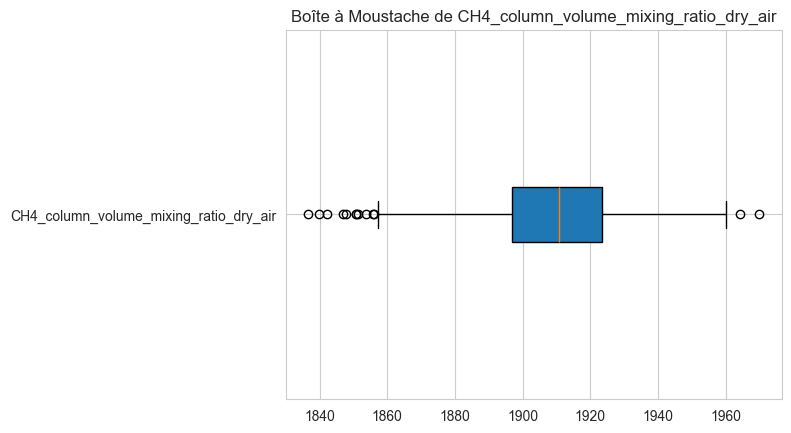

In [73]:
generate_box_plot(df_non_null['CH4_column_volume_mixing_ratio_dry_air'], 'CH4_column_volume_mixing_ratio_dry_air', show_outliers=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13748\3203122426.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")


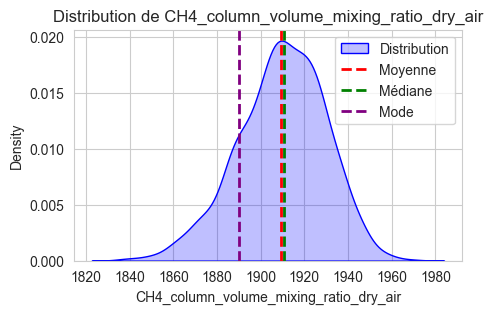

In [69]:
def visualiser_symetrie(df):
    col = ['CH4_column_volume_mixing_ratio_dry_air']
    for i, c in enumerate(col):
        sns.set_style("whitegrid")
        plt.figure(figsize=(5, 3))
        sns.kdeplot(df[c], shade=True, color="blue", label="Distribution")
        plt.axvline(np.mean(df[c]), color='red', linestyle='dashed', linewidth=2, label='Moyenne')
        plt.axvline(np.median(df[c]), color='green', linestyle='dashed', linewidth=2, label='Médiane')
        mode = round(df[c].mode().values[0],2)
        plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')
        plt.legend()
        plt.title('Distribution de '+c)
        plt.show()

visualiser_symetrie(df_non_null)

In [59]:
'''
2019-02-08', '2020-02-05
2023-02-08', '2024-02-05'''

"\n2019-02-08', '2020-02-05\n2023-02-08', '2024-02-05"

In [60]:
from datetime import datetime

start_date = datetime(2019, 2, 8)
end_date = datetime(2024, 2, 25)

num_days = (end_date - start_date).days + 1

print("Number of days between", start_date.date(), "and", end_date.date(), "is:", num_days)


Number of days between 2019-02-08 and 2024-02-25 is: 1844


In [61]:
#75% of data is non-null 